# Conhecendo o Geopandas

In [2]:
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

## Fonte de dados

http://www.geoservicos.ibge.gov.br/geoserver/wms?service=WFS&version=1.0.0&request=GetFeature&typeName=CREN:GeologiaPontoSD23&outputFormat=SHAPE-ZIP

In [6]:
geoBR = gpd.read_file('dados/originais/br_unidades_da_federacao/BR_UF_2019.shp')

In [7]:
type(geoBR)

geopandas.geodataframe.GeoDataFrame

In [8]:
geoBR

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17,Tocantins,TO,Norte,"POLYGON ((-48.23163 -5.94614, -48.23011 -5.938..."
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53742 ..."
8,22,Piauí,PI,Nordeste,"POLYGON ((-42.91539 -6.64607, -42.91645 -6.644..."
9,23,Ceará,CE,Nordeste,"POLYGON ((-41.18292 -4.01797, -41.18552 -4.017..."


<AxesSubplot:>

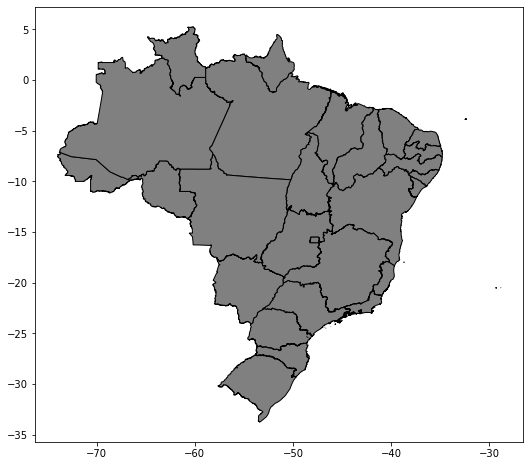

In [9]:
geoBR.plot(color='grey', edgecolor='black', figsize=(15,8))

<AxesSubplot:>

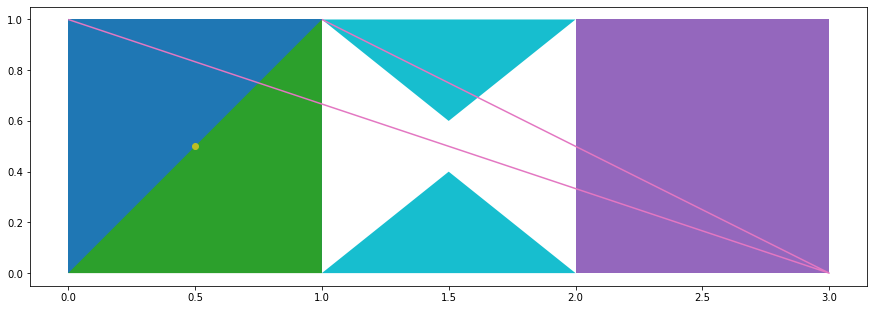

In [41]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])

p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

p4 = LineString([(0, 1), (3, 0), (1, 1)])
p5 = Point(0.5, 0.5)

# MutiPolygon
p6 = Polygon([(1, 0), (1.5, 0.4), (2, 0)])
p7 = Polygon([(1, 1), (1.5, 0.6), (2, 1)])
p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
g.plot(cmap='tab10', figsize=(15,8))

In [42]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

<AxesSubplot:>

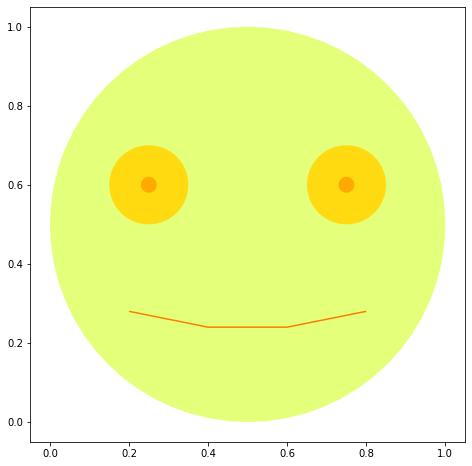

In [51]:
p1 = Point(0.5, 0.5).buffer(0.5)
p2 = MultiPolygon([Point(0.25, 0.6).buffer(0.1), 
                    Point(0.75, 0.6).buffer(0.1)])
p3 = MultiPolygon([Point(0.25, 0.6).buffer(0.02),
                    Point(0.75, 0.6).buffer(0.02)])
p4 = LineString([(0.2, 0.28), (0.4, 0.24), (0.6, 0.24), (0.8, 0.28)])

g = gpd.GeoSeries([p1, p2, p3, p4])
g.plot(cmap='Wistia', figsize=(15,8))